# ![title](images/ml_banner.jpeg)


# From Primer to Pro: completing a Data Science project with Machine Learning

Yesterday, we learnt about some of the key functionalities of the Pandas library. In particular, we learnt how to read in and manipulate a DataFrame, the Pandas premier data structure. 

During today's tutorial, we will:

**ML Focused with Scikit-Learn (Sklearn)**:

1. Briefly touch on the fundamentals of ML

2. It's an ML's world:
* Split a dataset into training and testing sets
* Train a simple ML model on a training set
* Evaluate the models' performance on the testing set
* Make predictions on new data


In the process, we will revisit:

**Pandas Focused**:
* Import the necessary libraries and load the dataset.
* Perform exploratory data analysis to understand the structure and characteristics of the dataset.
* Preprocess the data to handle missing values, outliers, and any other issues.


**Visualisation Focused**:
* Summarize your findings and present your results in a clear and concise manner.

By the end of this tutorial, we will have built an end-to-end Machine Learning project, centered about learning how to map some stellar properties and elemental abundances to the stellar age (mini-hackaton).


### Q: What are some things you've heard about AI/ML? What excites/terrifies you most about the whole thing?

Have a little look at a brief history of AI here: https://ourworldindata.org/brief-history-of-ai

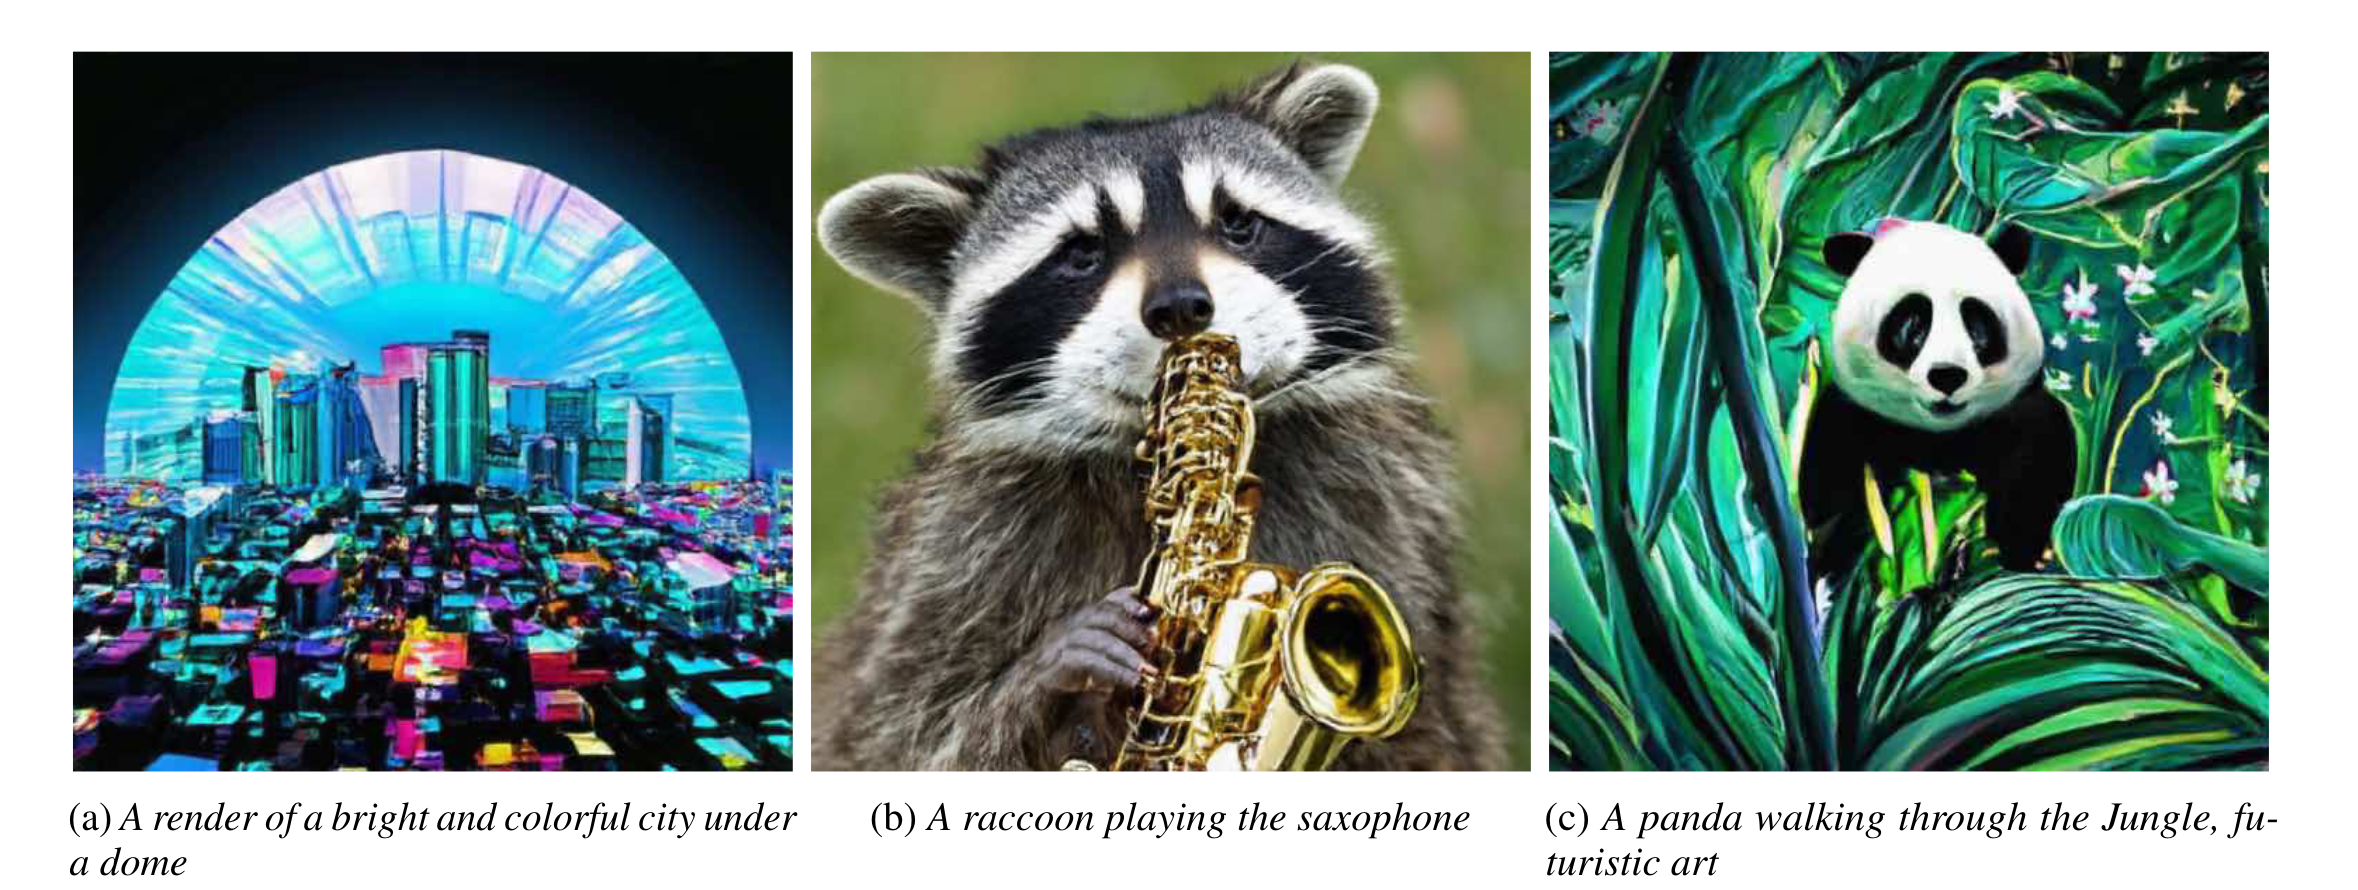

In [1]:
from IPython.display import Image
Image('images/ai.png') # Credit: simple-diffusion model by Hoogeboom et al. 2023

## The FUNdamentals of Machine Learning (see what I did there?)


* What is ML? 
* Two flavours of ML: Supervised & Unsupervised
* Insights into ML: Why logistic regression matters

### What is ML?

Machine Learning (ML) is a branch of Artificial Intelligence (AI), *where we use algorithms to automatically extract useful information from data*. 

We often times use Artificial Intelligence (AI), Machine Learning (ML) and Deep Learning (DL) interchangeably. But there are some valuable differences, and the way to remember them is by considering the following conceptual flow:

Data -> Representation -> Features -> Model -> Output

In the traditional setting of Machine Learning, what we do is we extract features that we think are relevant, and then learn the mapping between the features and the output. 

In the setting of Deep Learning, we humans don't worry about constructing the features, but instead we let it to the DL model to learn the best representation of the data, that will achieve the goal we want. 

Put it simply, let's say we want to classify cats from a dataset of images. In a traditional ML setting, we take those images, inspect them and come up with features like: colour, size, ear-to-nose ratio and then we use these features to map them to a meaningful output (cat class, dog class, human class, etc...). 

In a DL setting, we use the images themselves to perform this task. In terms of models, when we talk DL, we talk neural networks.

When we talk traditional ML, we talk tree-based networks, XGBoost, support-vector machines (check out the brilliant library scikit-learn (https://scikit-learn.org/stable/). As of lately, with the advent of computing resources such as GPUs, DL has become the de-facto approach to solve most ML tasks, using, for e.g., the PyTorch library (https://pytorch.org).


In this notebook, we will employ a more traditional ML setting.


I recommend the following two resources to get started in ML:

* Why do tree-based models still outperform deep learning on tabular data? by Grinsztajn et al. 2022: https://arxiv.org/abs/2207.08815
* Machine Learning in Astronomy: a practical overview by Dalia Baron: https://arxiv.org/abs/1904.07248


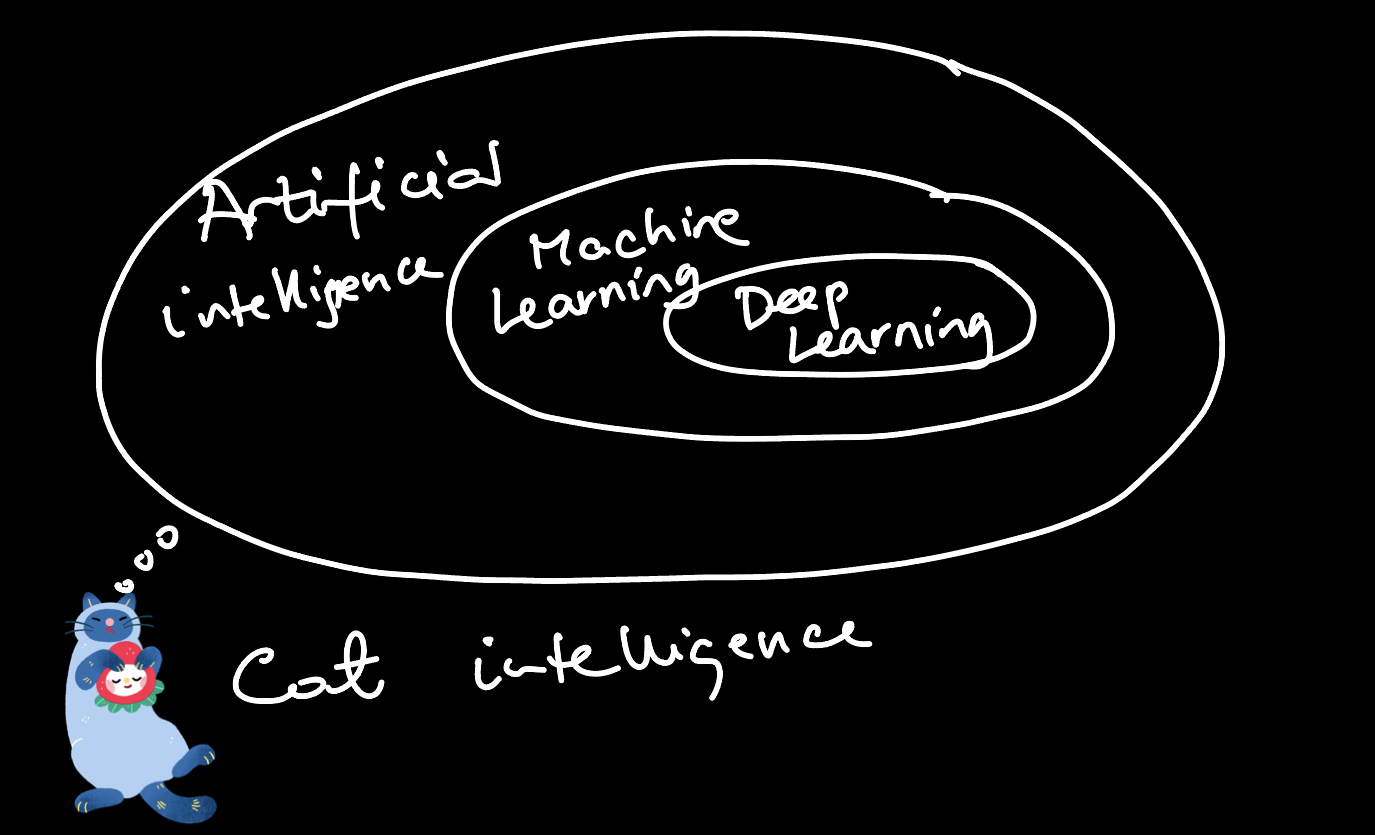

In [2]:
Image('images/ai_ml_dl.jpg', width=800) #credit: Deep Learning with Python, Chollet (2017) in the version of Human Jo

Keeping it simply, ML is having computers learn from data. And, in the process, make things easier for us. 

In our day to day lives, we want to solve these taks:

* classify things (very easy for humans). In my case, I can spot the mapo tofu dish 1 km away.
* predict things (depending on how many dimensions we're talking about, may be harder)
* imagine (domain of Artificial General Intelligence or AGI, but with new developments in natural language processing, i.e. things like ChatGPT and text-to-image translation, like DALL-E-2, machines now help us imagine new worlds)

More formally, ML is concerned with three key concepts: Data, Model and Learning. For the most part, we will worry about the Data.

To paraphrase Mitchell (1997), we say that the model M learns from data D if its performance on the task T improves after the data is taken into account. **The goal is to find good models that do a great job on yet unseen data (which we call the ability to generalise).** Learning means optimizing the parameters of the model so we can achieve our goal.  

For example, say we have a dataset consisting of images of cats and dogs (data D) and a model that has not seen the data (M). We want to classify cats and consider this to be our task (T). 

Before any learning is done, if we ask our model to classify any given image as a cat given four possible choices of cat, dog, human or robot, the model will not give any meaningful answer. The probability of getting the right answer at any time is 25% (either cat, dog, human, robot). Once we train the model by letting it "see" or learn from the data itself, our performance in the classification task is bound to improve.


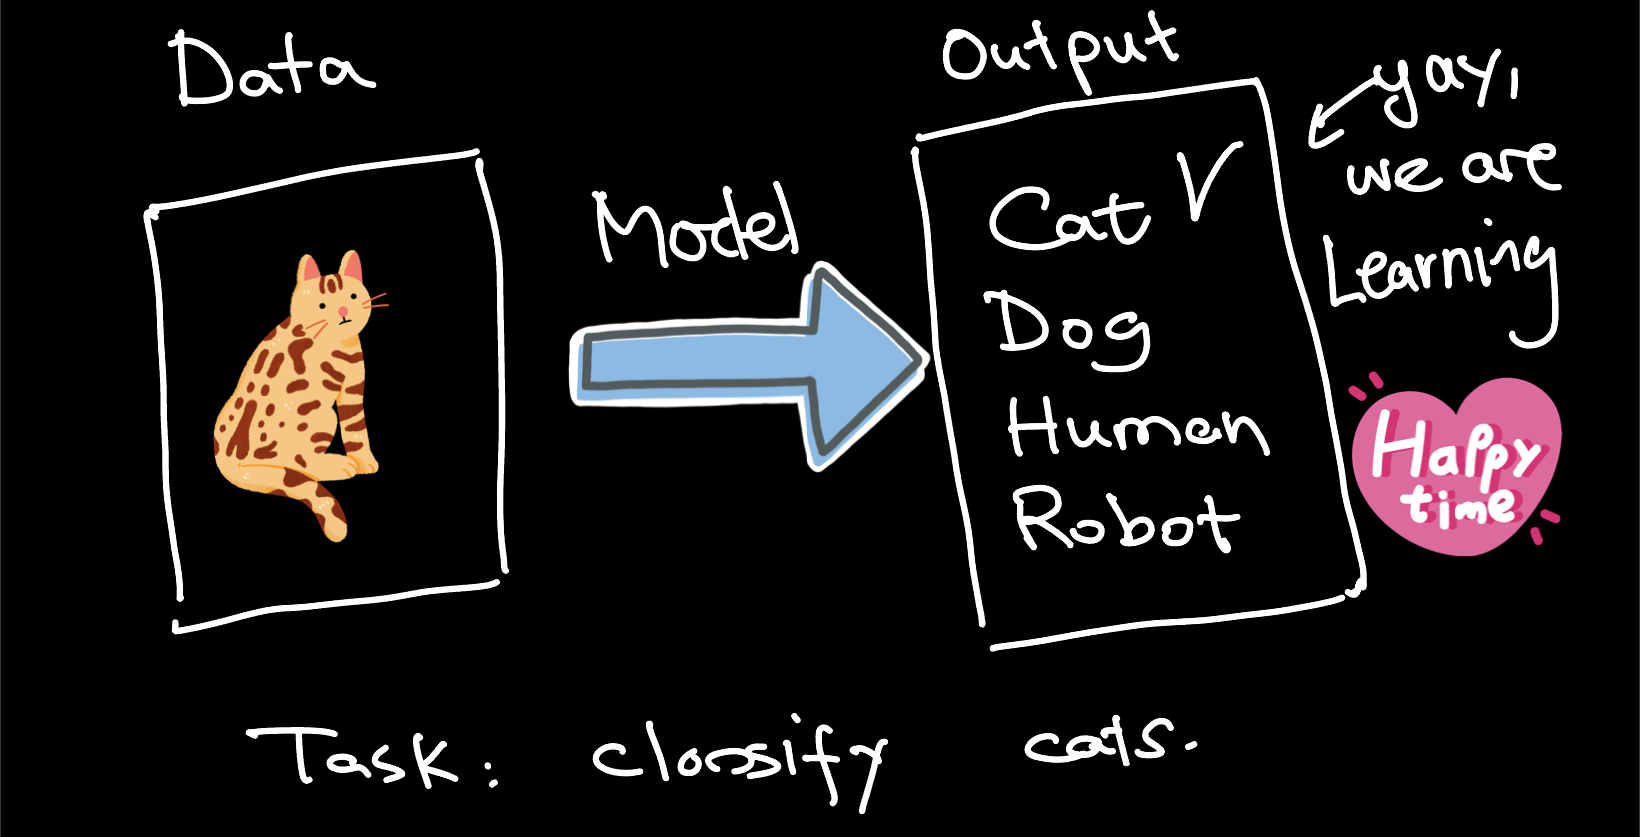

In [3]:
Image('images/kitties.jpg', width=600)

### Flavours of ML

* Supervised Learning
* Unsupervised Learning

We also have other flavours, like semi-supervised learning, which combines both worlds. For today, we'll keep it vanilla and chocolate.

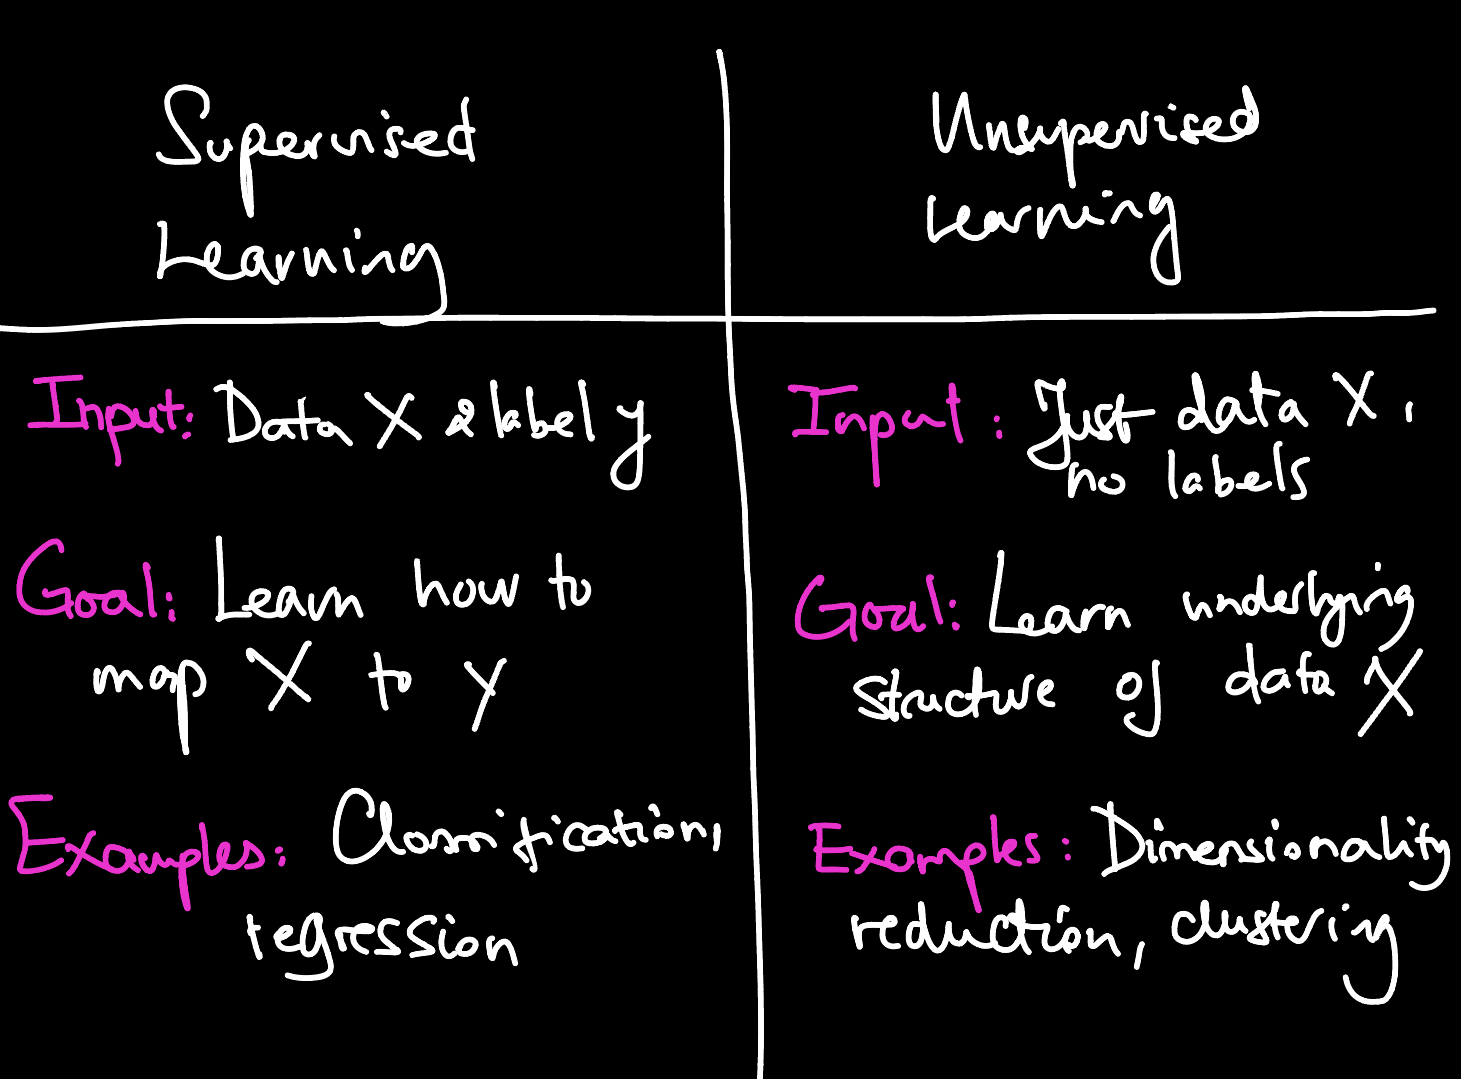

In [4]:
Image('images/ML_flavours.jpg', width=900)

Today we discuss supervised learning by first gaining some "philosophical" insight into Machine Learning by referring to logistic regression.


### Insights into ML

Jo: Linear regression, so much linear regression?

ChatAGI: No, logistic.

The section below closely follows the tutorial by Adam Miller given at the DSFP Session 14, Day 1. I suggest you check it out here: https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/main/Sessions/Session14/Day1/IntroToScikitLearnSolutions.ipynb

In [54]:
import numpy as np
import matplotlib.pyplot as plt
#set the seed
np.random.seed(42)
#Let's generate some data
n = 50
x = np.random.uniform(0,100, n) # choose 50 random numbers between 0 and 100
y_true = 3.1*x + 13
y_obs = y_true + np.random.normal(0, 15, n) # add some noise

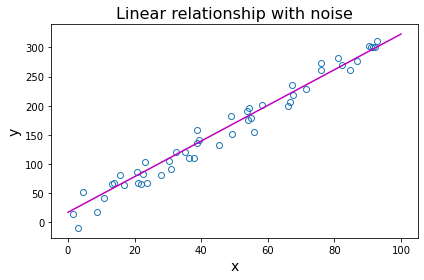

In [6]:
#Let's plot the data
fig, ax = plt.subplots()
ax.plot(x, y_obs, 'o', mfc="None")
ax.plot([0,100], [17, 323], 'm') # plot the true line  in magenta, just for comparison, for x = 0, y = 17 and x = 100, y = 327
ax.set_xlabel('x', fontsize=14) # set the x label
ax.set_ylabel('y', fontsize=14) # set the y label
ax.set_title('Linear relationship with noise', fontsize=16)
fig.tight_layout()

But nature works in such a way that we rarely have access to the process which generated the data that we observe. So our job is, given that we have the data and some assumptions about the noise, can we constrain the parameters of the process that generated this process? This is known as statistical inference, or what we do most of the time as astronomers.

So, let's forget we generated the data, and pretend we only have access to y_obs. What's the first thing a human wants to do with a scatter plot? 

In [7]:
#Let's fit a line! Or, a linear regression model
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [9]:
X = x.reshape(-1,1) # reshape x to be a 2D array with 1 column
print(X.shape)
reg_model.fit(X, y_obs) # fit the model

(50, 1)


LinearRegression()

#### Attention spotlight!

Note that the input data X is stored in a 2D array, where rows are sources and columns are feature values. In the supervised case, the target array y it's stored in a separate 1D array, target array y. To train a supervised model, we use .fit(X, y). New predictions can be made with .predict(Xnew).

The best fit is y = 3.181x + 8.539


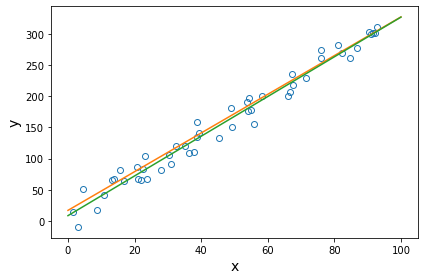

In [10]:
m = reg_model.coef_[0]
b = reg_model.intercept_

print(f'The best fit is y = {m:.3f}x + {b:.3f}') # get the best fit parameters

fig, ax = plt.subplots()
ax.plot(x, y_obs, 'o', mfc="None")
ax.plot([0,100], [17, 327])
ax.plot([0,100], [b, 100*m + b]) # plot the best fit line
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.tight_layout()

In [114]:
res = np.polyfit(x, y_obs, 1) # fit a 1st order polynomial using numpy
print('Using np.polyfit: y = {:.3f}x + {:.3f}'.format(*res))

Using np.polyfit: y = 3.077x + 14.695


Yay, we got a very nice result our data shows indeed a nice linear relationship. Now let's make things a bit more interesting.

Let's say our X data consists of the stellar mass for 200 stars. And let's say we have 2 classes, Class 0 and 1, corresponding to stars less and more massive than 60 M_solar, correspondingly.

(array([ 8.,  6.,  9., 18., 18., 17.,  8.,  7.,  7.,  2.]),
 array([ 18.36862725,  28.06331479,  37.75800233,  47.45268988,
         57.14737742,  66.84206497,  76.53675251,  86.23144005,
         95.9261276 , 105.62081514, 115.31550268]),
 <BarContainer object of 10 artists>)

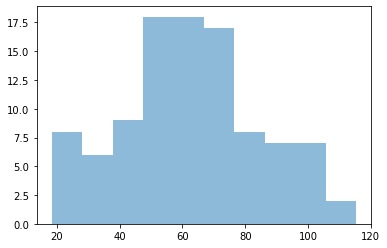

In [30]:
#Let's generate the data for a classification problem

n = 100
mass = np.random.normal(65, 20, size=n) # generate a normal distribution of masses (mean = 65, std = 20)

plt.hist(mass, alpha=0.5) # plot the histogram of the masses

(array([81.,  6.,  4.,  2.,  2.,  2.,  0.,  2.,  0.,  1.]),
 array([   20.20640755,  1404.71935531,  2789.23230306,  4173.74525082,
         5558.25819857,  6942.77114633,  8327.28409408,  9711.79704184,
        11096.30998959, 12480.82293735, 13865.3358851 ]),
 <BarContainer object of 10 artists>)

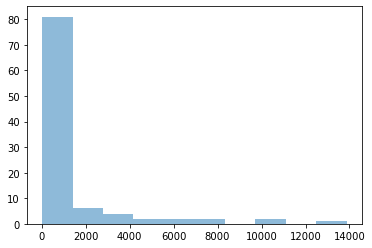

In [29]:
mass[mass > 70] *= (mass[mass > 70]-60)/60*5 # add some outliers

plt.hist(mass, alpha=0.5) # plot the histogram of the new masses

In [ ]:
y = (mass > 60).astype(bool) # create a binary variable for the classification problem, here we say that if the mass is > 60 (Class 1), then it is a massive star, otherwise is a dwarf (Class 0)

obs_mass = mass + np.random.normal(0, 7, size=n) # add some noise
X = obs_mass.reshape(-1,1) # reshape to be a 2D array with 1 column

print(X.shape)
print(y.shape)

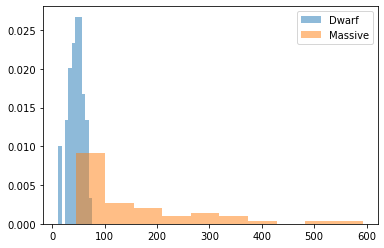

In [23]:
#Let's plot the data

plt.hist(X[y==0], alpha=0.5, label='Dwarf', density=True) #note we used a numpy array here but we can also use a pandas dataframe
plt.hist(X[y==1], alpha=0.5, label='Massive', density=True) 
plt.legend()

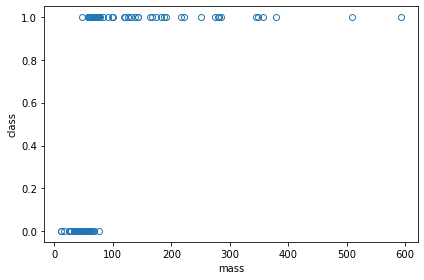

In [24]:
#Let's plot the data
fig, ax = plt.subplots()
ax.plot(X, y, 'o', mfc="None")

ax.set_xlabel('mass')
ax.set_ylabel('class')
fig.tight_layout()

#what happens if we try to find a linear model? What do you think the accuracy will be?

In [37]:
reg_model = LinearRegression()
reg_model.fit(X, y)

y_pred = (reg_model.predict(X) > 0.5).astype(int) # convert the predicted values to 0 or 1

n_incorrect = np.sum((y_pred - y)**2) # count the number of incorrect predictions

accuracy = (n - n_incorrect)/n # calculate the accuracy, which is the number of correct predictions, divided by the total number of instances

print(f'This model has an accuracy of {accuracy:.3f}') # print the accuracy

m = reg_model.coef_[0] # get the slope
b = reg_model.intercept_ # get the intercept

This model has an accuracy of 0.760


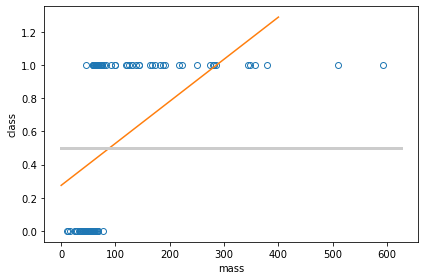

In [38]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', mfc="None")

model = np.poly1d([m, b]) # create a function that returns the predicted value for a given mass
ax.plot([0, 400], model([0,400])) # plot the best fit line
ax.plot([0,625], [0.5, 0.5], '0.8', lw=3) # plot the threshold line
ax.set_xlabel('mass')
ax.set_ylabel('class')
fig.tight_layout()

#### Logistic Regression: Who dis?


Logistic regression transforms its output to return a probability value.

Unlike using linear regression, where the predictions can overshot the [0, 1] range, in logistic regression, the predictions stay within [0, 1].

This makes it very powerful for any classification task - it's a building block for ML classification.

Please have a read about this brilliant idea by, for example, reading here https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148.

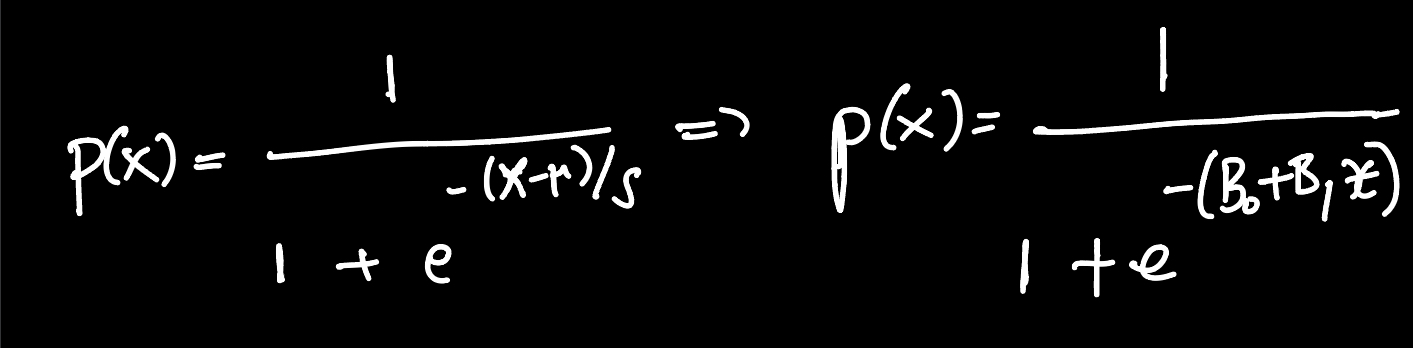

In [84]:
Image('images/logreg.jpg')

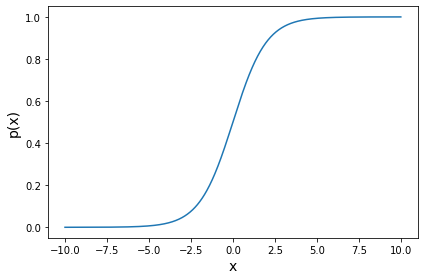

In [39]:
x = np.linspace(-10,10,1000) # create a range of values from -10 to 10

p_x = 1/(1 + np.exp(-x)) # calculate the probability for each value

fig, ax = plt.subplots()
ax.plot(x, p_x)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('p(x)', fontsize=14)
fig.tight_layout()

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X).astype(int) # convert the predicted values to 0 or 1

n_incorrect = np.sum((y_pred - y)**2) # count the number of incorrect predictions

accuracy = (n  - n_incorrect)/n # calculate the accuracy

print(f'This model has an accuracy of {accuracy:.3f}')

This model has an accuracy of 0.880


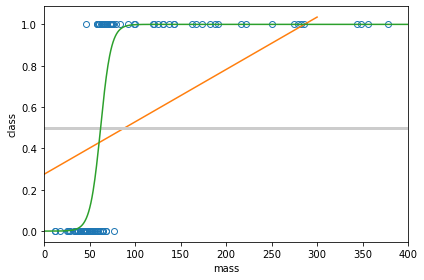

In [35]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', mfc="None")
model = np.poly1d([m, b])
ax.plot([0, 300], model([0,300]))
ax.plot([0,625], [0.5, 0.5], '0.8', lw=3)

dat_grid = np.linspace(0, 625, 1000) # create a grid of masses to plot the model
logmodel = 1/(1 + np.exp(-logreg.intercept_ - logreg.coef_[0]*dat_grid)) # calculate the predicted probability for each mass
ax.plot(dat_grid, logmodel) # plot the model
ax.set_xlabel('mass')
ax.set_ylabel('class')
ax.set_xlim(0, 400)
fig.tight_layout()


## It's an ML's world: training & evaluation.

#### Our steps are:

* Once data has been processed and explored, we want to represent data as vectors.
* We choose an appropriate model
* We learn from available data by using numerical optimization methods with the aim that the model performs well on data not used for training.


#### Prep Data for Training:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
#dropna() removes any rows with missing data

iris = iris.dropna()

X = iris.drop('species', axis=1) #we only want the sepal_length, sepal_width, petal_length, and petal_width columns as our feature columns
y = iris['species'] #we want the species column as our target column

#but we want to make y numeric, so map setosa to 0, versicolor and virginica to 1 (this is a binary classification problem)
y = y.map({'setosa':0, 'versicolor':1, 'virginica':1}) #we could also use LabelEncoder() from sklearn.preprocessing

In [44]:
#let's have a look at X, still a dataframe, sometimes the ML model wants a numpy array

#make X and y into a numpy array
#X = X.values
#y = y.values 

array([5.1, 3.5, 1.4, 0.2])

### Let us train

Now we have our data, we want to learn the map f to map our input, X, to the output, y. This map can is our ML model, and can come in a myriad of forms, as we saw before, a simple linear or logistic model, or could be a very fancy neural-net baser architecture.

$f(X) = y$

Our model has a set of parameters, $f_{\theta}$. Our goal in training is to come up with a set of parameters $\theta$ such that the model prediction deviates as little as possible from truth, i.e. minimise the difference between prediction and truth across our entire training sample.



Let us denote the **input features** representing that the data or information we have about a certain system by $x_i$, and the output or **target** variable, meaning the quantity that we are trying to predict, by $y_i$. We call $(x_i, y_i)$ a training pair.

We can then define the training set as the collection of $n$ training pairs:

* Training set: $\{(x_1, y_1),..., (x_n, y_n)\} \in \mathbb{R}^n \times  \mathbb{Y} $

Furthermore:
* $\mathbb{y}$ continuous: regression (e.g., price of car depending on manufacturer, size, even colour?)
* $\mathbb{y}$ discrete: classification (e.g., cat, dog from images)
* Large scale ML: both n and d are large:

  * d: the dimension of each input sample
  * n: number of samples 

The large d and n for large scale ML require optimisation algorithms powerful enough to handle them. 

We must first ask the question, at the very core, what kind of problem are we trying to solve? We are trying to minimize a cost function (or a loss function):
$$\frac{1}{n} \sum_{i = 1}^n \mathrm{loss}(y_i, \text{f}_{\theta}(x_i)) = \frac{1}{n} \sum_{i = 1}^n f_i(\mathbf{\theta}).$$

To minimise the function, we can differentiate it and find its minimum. There are many good resources to help you guide your intuition into how this works, but there are ways to find the set of parameters $\theta_{*}$ for which that sum reaches a minimum. For example, check out Prof Andrew Ng's (check out his CS229 Stanford Lecture notes (https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf) on supervised machine learning. 


#### But also, (validate) and test.

* ML parameters: what is learnt during training.

* ML hyperparamers: what we pass to the model.

**Validation helps with the hyperparameter choice for our model.**



1. Choose a machine learning algorithm.

2. Choose hyperparameters for the model.

3. Fit the model to the training data.

4. Evaluate performance on validation data.

5. Do (2) to (4) until we're happy, then apply model to test data.


For today, we bypass validation, and only use train-test setup. Good to note that validation is paramount for an excellent ML analysis.


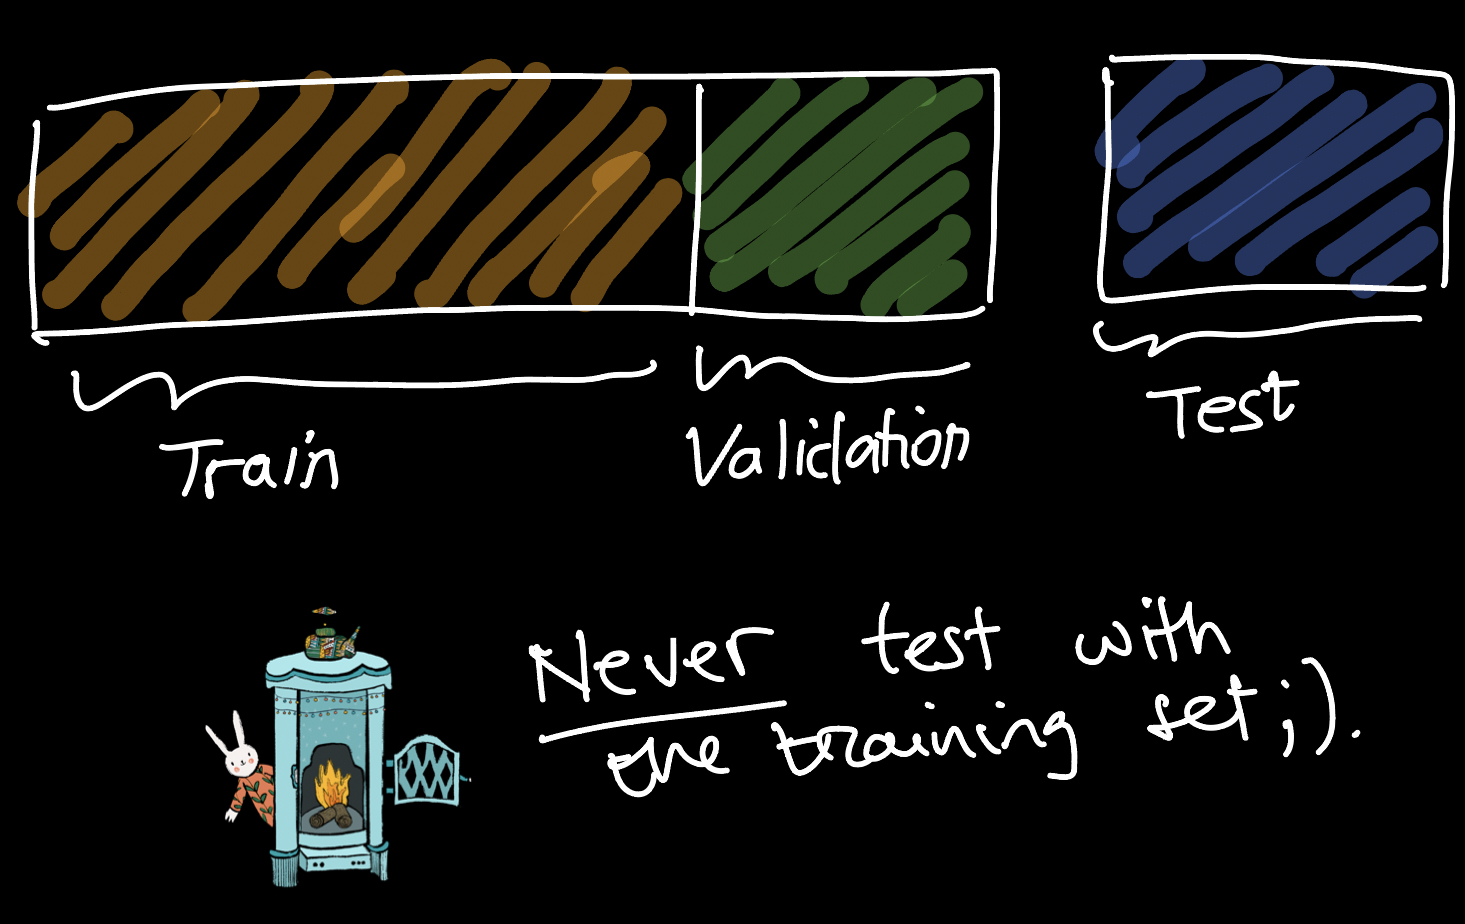

In [59]:
Image('images/train_test.jpg', width=700)

In [ ]:
#split the dataset into train and test  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#let's have a look at the shapes of the arrays
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

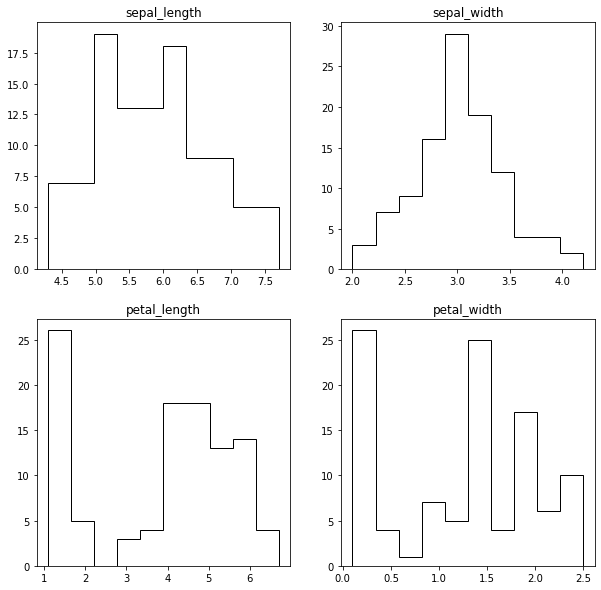

In [46]:
#for all all the columns in X, look at the histogram

fig, ax = plt.subplots(2,2, figsize=(10,10))
for i, col in enumerate(X_train.columns):
    ax[i//2, i%2].hist(X_train[col], histtype='step', color='k')
    ax[i//2, i%2].set_title(col)


In [47]:
# #standardize value
# value_standard = (value - value.mean())/value.std() #we'll show that, in the case of iris dataset, it's okay to use the original data, but sometimes we might need to standardise some features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) #fit the scaler to the training data, and then transform the training data

X_test = sc.transform(X_test) #transform the test data using the same scaler

print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(105, 4)


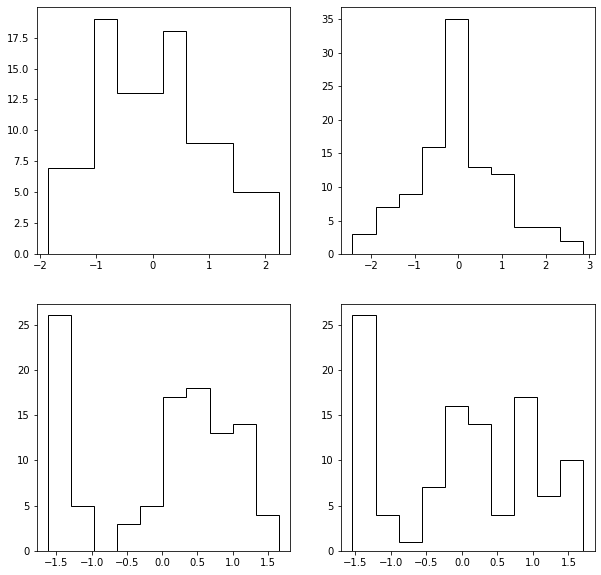

In [48]:
#plot the histograms again but for the X_train numpy array

fig, ax = plt.subplots(2,2, figsize=(10,10))
for i, col in enumerate(X_train.T):
    ax[i//2, i%2].hist(col, histtype='step', color='k')

In [49]:
#let's try a logistic regression model
#first we need to import the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() #create a logistic regression model
classifier.fit(X_train, y_train)  #fit the model to the training data


LogisticRegression()

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)

### Evaluation Metrics

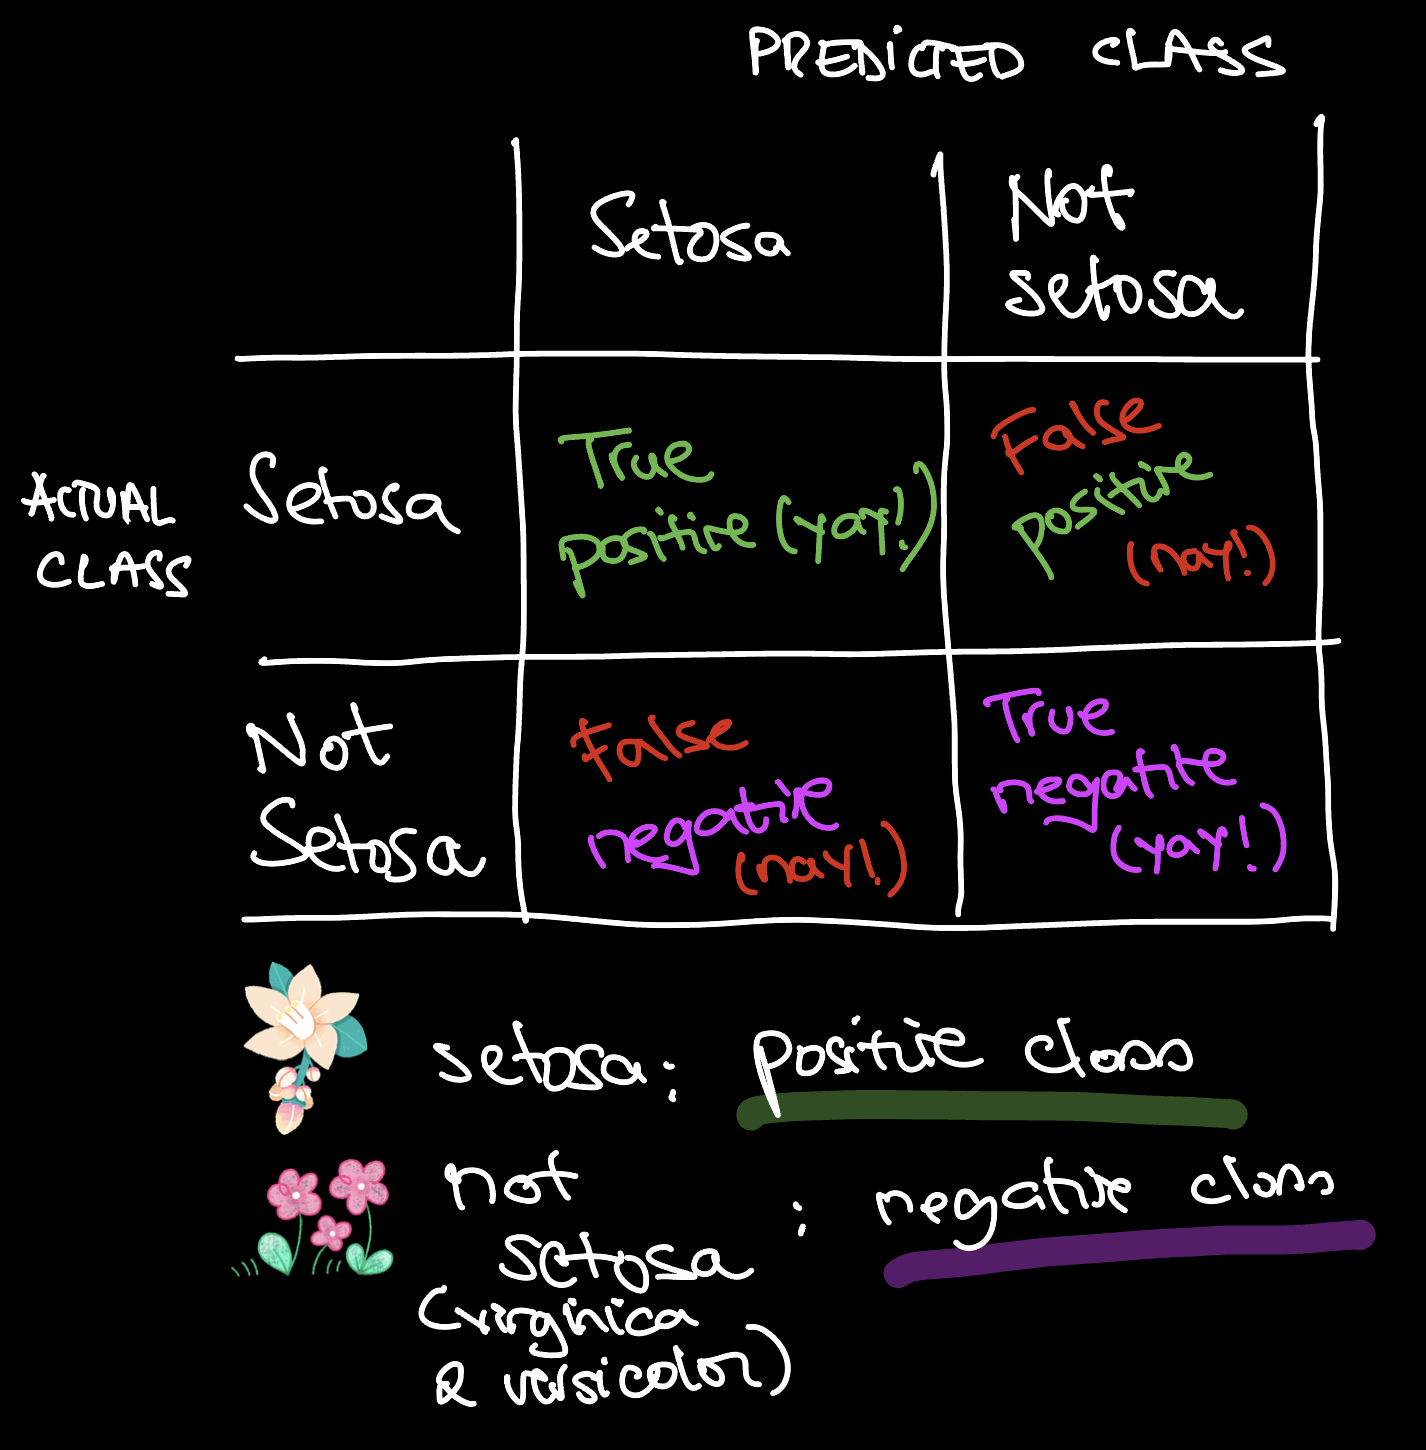

In [79]:
Image('images/metrics.jpg', width = 700)

We can define a few key metrics to evaluate our ML model's

* $recall =   TP/(TP + FN)$

* $precision = TP/(TP + FP)$

* $accuracy = (TP + TN)/(TP + TN + FP + FN)$

* f1 = $2 \times precision \times recall/(precision + recall)$

where TP is the true positive, FN is the false negative, TN is the true negative and FP is the false positive.

Note that there are two possible errors, FP and FN. And two ways to be correct, TP and TN.



In [51]:
#import the confusion matrix
from sklearn.metrics import confusion_matrix
#also show the confusion matrix
cm =  confusion_matrix(y_test, y_pred)

print('Confusion matrix: ', cm)


Confusion matrix:  [[19  0]
 [ 0 26]]


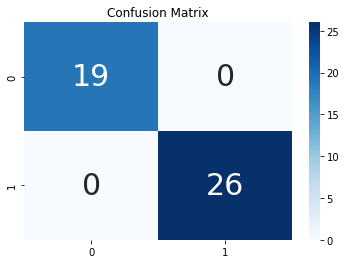

In [52]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [53]:
#let's see what our model got right and what it got wrong
#print('Accuracy: ', accuracy_score(y_test, y_pred))

#show the recall, precision, and f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Apply model to new data

Once you're happy with your model (hint: you're never happy with it...)

In [57]:
#create some completely new data
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [6.5, 3.0, 5.5, 1.8], [5.8, 2.7, 5.1, 1.9]])
X_new.shape

#standardise the new data
X_new = sc.transform(X_new)

#predict the class of the new data
y_new = classifier.predict(X_new)
y_new

(3, 4)

## Mini-hackaton: Let's do some data science

During the hackathon, we will spend the next hour to explore a new dataset. At the end of the exploration (~40 mins), each team should upload one or two plots to the slack random channel (plot EDA and/or plot ML), and each team will briefly discuss what they've uncovered. 

The idea is for us to learn and to have fun while we play with machine learning.

Let's make a few teams of around 3 to 4 people, and each team should come up with a name during the break.

### Q: What is the first thing we need to worry about? 

A. Model

B. Data

C. Learning

D. Deep Neural Network with a Convolutional Layer

E. Dinner, Jo. Duh.


### The Data.

The data we will work with today comprises of around 10,000 giant stars, for which he have a few key information available in terms of their chemistry, kinematics and ages. The dataset is called 'ages_day2.csv' and is in your data folder. 

You have 2 different age determinations, age_astroNN and age_jo, that you can choose from. 

*The goal* is to build an ML model that can successfully map the stellar properties and some abundances to the age. 

A good model will allow us to unleash it on much larger datasets, for which we don't know the age, so that we can examine the age-structure of the Galaxy, for example,by looking at the R-z distribution of the stars, colored by age.

Throughout the week, you will learn more about Galactic Archaeology, but it's good to familiarise already with some concepts.

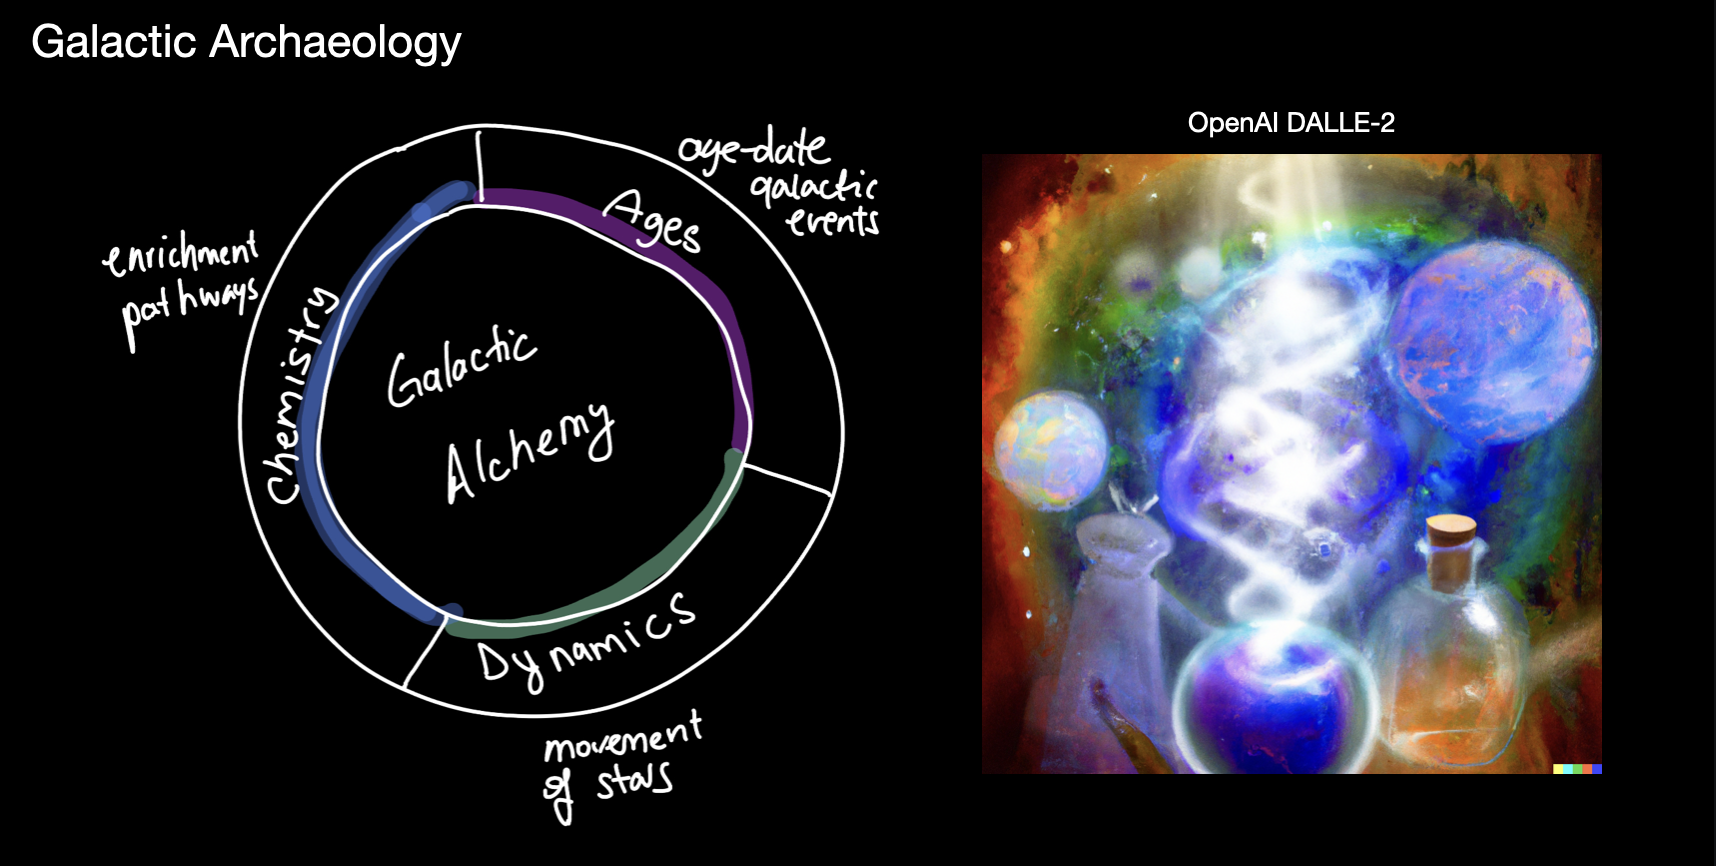

In [55]:
Image('images/ga.png')

In [ ]:
#these are the biggies we need to import

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#it's possible to morph an astropy table into a pandas table

#from astropy.table import Table

# Read in the data
#data = Table.read('table.fits')

#df = data.to_pandas()

In [61]:
data = pd.read_csv('data/ ') #complete here

In [ ]:
# we want to examine the data
# see the columns
# how many missing values

data. #complete here, get overall information
data. #get summary statistics

In [ ]:
data. #get rid of missing values
#print the shape of the data
print(data. )#complete here

### Q3: Plot the Hertsprung-Russell diagramn to confirm these are giant stars.

In [ ]:
teff  =  #to just get the values from the dataframe, you can use df['teff'].values
logg = 

#create a fig instance
fig = 
#plot the HR diagramn
plt.scatter()
#add labels and a title
plt.xlabel()#complete between the parantheses
plt.ylabel()
plt.title() #complete between the parantheses

### Q4: Explore the data, look at the columns, decide which ones might be worth using as features for your ML model. First hackaton EDA plot!


Hint: You want to focus on the stellar properties, and the abundances.




In [ ]:
# we want to see the distribution of the data

plt.hist(data[''], bins=20) #complete here, choose some columns

In [ ]:
# we want to see the correlation between the columns


col_subset = data[['', '', '']] #complete here, choose some columns, make sure you choose the age, some chemisty like Mg, Fe, and some stellar properties like teff, logg, and feh

df_subset = data[] # complete here with the columns chosen above, focus on the stellar properties,

# we want to see the correlation between the columns
sns.heatmap() #complete here, hint look at yesterday's notebook


In [ ]:
# look at the scatterplot of various variables with each other and the age

sns.pairplot() #complete here, hint look at yesterday's notebook, use df_subset 


In [ ]:
#how abous using an lm plot? 
sns.lmplot() #complete here

### Q5: It's an ML's world. Free form to explore. Second plot of the Hackaton!

Get the data you need, standardise it, inject it into a classifier/regression model of your choice and evaluate its performance. Look at the nice tutorials from https://scikit-learn.org/stable/ to help you with the task.

For regression:

f(some features) = age, use a regression algorithm

For classification:

Take the age column, come up with a few categories (minimum 2): Young and Old, so for example if age > SOME NUMBER, old, otherwise, young. Create a new column, age_pop, and use a classification algorithm.

f(some features) = Class 0, 1, ... K, where 0...K are the age populations


The algorithms like X to be a 2D array, and y 1D array, so if you're using pandas, you can call .values to get the data from dataframe to numpy. Most of the times you can use the dataframe directly as we did in the example above.

In [70]:
# let's create a pandas dataframe from a dictionary consisting of how many cats and dogs a given household has
d = {'cats': [1,3,5,7,9], 'dogs': [2,4,6,8,10], 'income': [1000, 3000, 2000, 500, 50]}
df_test = pd.DataFrame(d)

x_test = df_test.drop('income', axis=1)
print(x_test)

y_test = df_test['income']

cats  dogs
0     1     2
1     3     4
2     5     6
3     7     8
4     9    10

In [78]:
print('who dis?')
print('is it X? ')
x_arr = x_test.values
print('shape', x_arr.shape) #5 columns, 2 samples
print('type', type(x_arr)) #the type
print()
print('is it y? ')
y_arr = df_test['income'].values
print('shape', y_arr.shape)
print('type', type(y_arr))


who dis?
is it X? 
shape (5, 2)
type <class 'numpy.ndarray'>

is it y? 
shape (5,)
type <class 'numpy.ndarray'>


### Let's hack(athon)...